#### The NYC Permitted Event Information dataset contains information on approved event applications that will take place in the next month. <br> And I'm working to identify how each event relates to each station from the MTA datasets.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
def concant(weeks):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    
    dfs = []
    for i in weeks:
        url_file = url.format(i)
        print(url_file)
        dfs.append(pd.read_csv(url_file))
    return pd.concat(dfs)

In [92]:
from datetime import datetime, timedelta

def generate_dates (sdate):
    dates = pd.date_range(sdate,pd.to_datetime("today")-timedelta(days=1),freq='w-sat')
    weeks = [i.strftime('%y%m%d') for i in list(dates)]

    return concant(weeks)

In [147]:
df = generate_dates('2021-06-27')

http://web.mta.info/developers/data/nyct/turnstile/turnstile_210703.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210710.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210717.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210724.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210731.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210807.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210814.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210821.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210828.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210904.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210911.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210918.txt
http://web.mta.info/developers/data/nyct/turnstile/turnstile_210925.txt


In [148]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,00:00:00,REGULAR,7592792,2595706
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,04:00:00,REGULAR,7592804,2595713
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,08:00:00,REGULAR,7592816,2595729
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,12:00:00,REGULAR,7592870,2595762
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/26/2021,16:00:00,REGULAR,7592992,2595791


In [150]:
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [161]:
df['DATE'] = df['DATE'].apply(pd.to_datetime)
df['DATE'].head()

0   2021-06-26
1   2021-06-26
2   2021-06-26
3   2021-06-26
4   2021-06-26
Name: DATE, dtype: datetime64[ns]

##### Read NYC events dataset


In [53]:
df_event = pd.read_csv("NYC_Permitted_Event_Information.csv")
df_event.head()

,Event ID,Event Name,Start Date/Time,End Date/Time,Event Agency,Event Type,Event Borough,Event Location,Event Street Side,Street Closure Type,Community Board,Police Precinct
0,598895,Baseball - Adults,10/20/2021 12:00:00 PM,10/20/2021 05:00:00 PM,Parks Department,Sport - Adult,Bronx,Van Cortlandt Park: Stadium-Baseball-01,NaN,NaN,"26,","50,"
1,581423,Soccer - Non Regulation,10/12/2021 03:00:00 PM,10/12/2021 06:00:00 PM,Parks Department,Sport - Youth,Brooklyn,"Bush Terminal Park: Soccer-02 ,Bush Terminal P...",NaN,NaN,"01, 07, 08, 10, 13, 16,","60, 68, 72, 73, 77, 94,"
2,589278,Soccer - Non Regulation,10/15/2021 12:00:00 PM,10/15/2021 05:30:00 PM,Parks Department,Sport - Youth,Staten Island,Fairview Park: Multi-Purpose Play Area-01,NaN,NaN,"3,","123,"
3,585078,Soccer -Regulation,10/22/2021 10:00:00 AM,10/22/2021 11:30:00 AM,Parks Department,Sport - Youth,Manhattan,Randall's Island Park: Wards Meadow Fields-Soc...,NaN,NaN,"11,","25,"
4,590861,Lawn Closure of Veterans lawn,10/21/2021 12:01:00 AM,10/21/2021 11:00:00 PM,Parks Department,Special Event,Manhattan,Madison Square Park: Veterans Lawn,NaN,NaN,"5,","13,"


##### Find the percentage of missing values in each column in the event dataset


In [54]:
for col in df_event.columns:
    pct_missing = np.mean(df_event[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Event ID - 0%
Event Name - 0%
Start Date/Time - 0%
End Date/Time - 0%
Event Agency - 0%
Event Type - 0%
Event Borough - 0%
Event Location - 0%
Event Street Side - 97%
Street Closure Type - 97%
Community Board - 0%
Police Precinct - 0%


##### Drop columns with missing values


In [55]:
df_event.columns

Index(['Event ID', 'Event Name', 'Start Date/Time', 'End Date/Time',
       'Event Agency', 'Event Type', 'Event Borough', 'Event Location',
       'Event Street Side', 'Street Closure Type', 'Community Board',
       'Police Precinct'],
      dtype='object')

In [56]:
df_event = df_event.drop(labels=['Event Street Side','Street Closure Type'],axis=1)
df_event.columns

Index(['Event ID', 'Event Name', 'Start Date/Time', 'End Date/Time',
       'Event Agency', 'Event Type', 'Event Borough', 'Event Location',
       'Community Board', 'Police Precinct'],
      dtype='object')

##### Checking the type of each column


In [57]:
df_event.dtypes

Event ID            int64
Event Name         object
Start Date/Time    object
End Date/Time      object
Event Agency       object
Event Type         object
Event Borough      object
Event Location     object
Community Board    object
Police Precinct    object
dtype: object

##### Convert Start and End date to datetime objects

In [58]:
df_event[['Start Date/Time','End Date/Time']] = df_event[['Start Date/Time','End Date/Time']].apply(pd.to_datetime)

In [59]:
df_event.dtypes

Event ID                    int64
Event Name                 object
Start Date/Time    datetime64[ns]
End Date/Time      datetime64[ns]
Event Agency               object
Event Type                 object
Event Borough              object
Event Location             object
Community Board            object
Police Precinct            object
dtype: object

In [60]:
for col in df_event.columns:
    pct_missing = np.mean(df_event[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Event ID - 0%
Event Name - 0%
Start Date/Time - 0%
End Date/Time - 0%
Event Agency - 0%
Event Type - 0%
Event Borough - 0%
Event Location - 0%
Community Board - 0%
Police Precinct - 0%


In [89]:
event_locations = df_event['Event Location'].unique()
#print(sorted(locations))
print(len(locations))

3523


In [90]:
df_event["Event Type"] = df_event["Event Type"].str.strip(' ')
event_type = df_event["Event Type"].unique()
print(event_type)


['Sport - Adult' 'Sport - Youth' 'Special Event' 'Farmers Market'
 'Religious Event' 'Street Event' 'Block Party' 'Production Event'
 'Open Culture' 'Parade' 'Stickball' 'Shooting Permit' 'Plaza Event'
 'Sidewalk Sale' 'Theater Load in and Load Outs' 'Press Conference'
 'Single Block Festival' 'Athletic Race / Tour' 'Health Fair'
 'Plaza Partner Event' 'Rigging Permit' 'Street Festival' 'Rally']


In [112]:
events_date = df_event['Start Date/Time'].dt.date.value_counts()
events_date

2021-09-25    1299
2021-10-02    1072
2021-09-26    1071
2021-10-16     956
2021-10-03     954
              ... 
2021-12-23       1
2021-11-03       1
2021-11-10       1
2021-12-30       1
2021-12-02       1
Name: Start Date/Time, Length: 118, dtype: int64

In [146]:
events_date.shape

(118,)

<AxesSubplot:ylabel='Start Date/Time'>

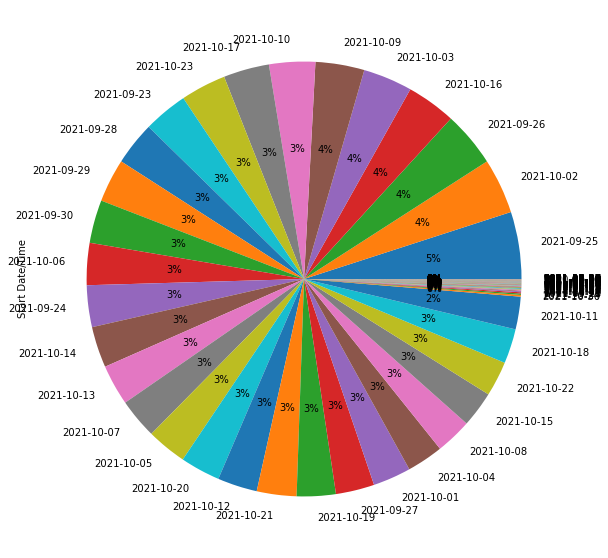

In [113]:
# plt.plot(events_date)
events_date.plot(kind='pie', figsize=(10,10),autopct='%1.0f%%')

In [124]:
grouped_by_date = df_event.groupby(df_event['Start Date/Time'].dt.date)[["Event Type"]].max()

In [131]:
grouped_by_date = pd.DataFrame(grouped_by_date)
grouped_by_date = grouped_by_date.sort_values('Start Date/Time')
grouped_by_date

,Event Type
Start Date/Time,
2020-08-18,Production Event
2021-01-04,Shooting Permit
2021-05-09,Production Event
2021-06-27,Production Event
2021-07-03,Street Event
...,...
2021-12-23,Special Event
2021-12-28,Special Event
2021-12-29,Special Event


In [132]:
boroughs = df_event['Event Borough'].unique()
boroughs

array(['Bronx', 'Brooklyn', 'Staten Island', 'Manhattan', 'Queens'],
      dtype=object)

In [176]:
## get the count of each event type in each borough
from collections import Counter

bronx_list = df_event.loc[df_event['Event Borough'] == 'Bronx']
bronx_list_count = bronx_list['Event Type'].value_counts()
print(bronx_list_count)

brooklyn_list = df_event.loc[df_event['Event Borough'] == 'Brooklyn']
brooklyn_list_count = brooklyn_list['Event Type'].value_counts()
print(brooklyn_list_count)

staten_island_list = df_event.loc[df_event['Event Borough'] == 'Staten Island']
staten_island_list_count = staten_island_list['Event Type'].value_counts()
print(staten_island_list_count)

manhattan_list = df_event.loc[df_event['Event Borough'] == 'Manhattan']
manhattan_list_count = manhattan_list['Event Type'].value_counts()
print(manhattan_list_count)

queens_list = df_event.loc[df_event['Event Borough'] == 'Queens']
queens_list_count = queens_list['Event Type'].value_counts()
print(queens_list_count)

Sport - Youth            2283
Special Event             479
Sport - Adult             218
Farmers Market             45
Street Event               10
Sidewalk Sale               8
Stickball                   4
Athletic Race / Tour        3
Parade                      3
Open Culture                2
Single Block Festival       2
Press Conference            1
Block Party                 1
Plaza Event                 1
Name: Event Type, dtype: int64
Sport - Youth            4292
Sport - Adult             843
Special Event             742
Farmers Market             78
Block Party                60
Street Event               38
Religious Event            35
Open Culture               10
Parade                      9
Plaza Partner Event         9
Production Event            7
Athletic Race / Tour        2
Plaza Event                 2
Single Block Festival       1
Rigging Permit              1
Street Festival             1
Name: Event Type, dtype: int64
Sport - Youth    816
Special Event    

In [145]:
events_type_count = df_event["Event Type"].value_counts()
events_type_count

Sport - Youth                    16539
Sport - Adult                     4587
Special Event                     4133
Farmers Market                     283
Street Event                       120
Block Party                         80
Religious Event                     63
Plaza Event                         42
Production Event                    39
Plaza Partner Event                 38
Sidewalk Sale                       28
Parade                              27
Theater Load in and Load Outs       26
Open Culture                        25
Single Block Festival               10
Athletic Race / Tour                 9
Street Festival                      6
Health Fair                          4
Stickball                            4
Rigging Permit                       1
Shooting Permit                      1
Press Conference                     1
Rally                                1
Name: Event Type, dtype: int64

In [ ]:
# boroughs

# men_means = [20, 35, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()

# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
# ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#        label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()